In [221]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

%matplotlib inline

#random.seed(11)

# Load Data

In [97]:
#Loading dataset
## Here one can consider as many samples even the entire dataset available
## by changing the value of the parameter min_faces_per_person
## and can resize the images as well in the range from 0 to 1

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, row, col = lfw_people.images.shape

data = lfw_people.data
label = lfw_people.target

n_features = data.shape[1]
class_names = lfw_people.target_names
n_classes = len(label_names)

print(f'Dataset Summary:\nNo of Sample Images-{n_samples}\nNo of Rows-{row}\nNo of columns-{col}')


Dataset Summary:
No of Sample Images-639
No of Rows-50
No of columns-37


# Train Test split

In [100]:
train_data, test_data, train_class, test_class = train_test_split(data, label, test_size = 0.25, random_state = 113)



# Dimension Reduction

In [161]:
## Extracting the features from train_data

t0 = time()

new_features = 150

pca = PCA(n_components = new_features)
pca.fit(data)

#Projection of train and test data on the PCA space
train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

#storing the Eigen-faces
eigen_faces = pca.components_.reshape((new_features, row, col))


print(f'Time taken: {(time()-t0) * 1000} MilliSeconds')

###### showing the eigen faces #######
#plt.imshow(eigen_faces[0,:,:], cmap = 'gray')

Time taken: 140.91801643371582 MilliSeconds


# Classification with SVM (Model Selection for the data with reduced features)

In [225]:
# Model selction using SVM
t0 = time()
c = 1.0
count1 = 0

### Tuning C and gamma parameters for finding the best solution space
while(count1 < 5):
    count2 = 0
    g = 0.1
    while count2 < 5:
        t1 = time()
        
        model = SVC(C = 1000, gamma = 0.001, kernel='rbf', decision_function_shape='ovo')
        model.fit(train_data_pca, train_class[:])
        prediction = model.predict(test_data_pca)
        acc = accuracy_score(test_class, prediction)
        
        print(f'\n\nFor c = {c} and gamma = {g} classification results-\n')
        print(f'Accuracy = {acc * 100}%\n')
        print(f'Classification Report-->\n {classification_report(test_class, prediction, target_names = class_names)}\n')
        print(f'Confusion Matrix-->\n {confusion_matrix(test_class, prediction, labels = range(n_classes))}\n')
        
        g /= 10
        count2 += 1
    
    c *= 10
    count1 += 1
    print(f'Time taken for tuning  a C and 5 gammas = {(time()-t1) * 1000} MilliSeconds')

        
print(f'\nTime taken for the whole process = {(time()-t1) * 1000} MilliSeconds\n')





For c = 1.0 and gamma = 0.1 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 1.0 and gamma = 0.01 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22 

C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 1.0 and gamma = 0.0001 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 1.0 and gamma = 1e-05 classificatio

C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]

Time taken for tuning  1 C and 5 gammas = 0.09694671630859375 seconds


For c = 10.0 and gamma = 0.1 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [

C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 10.0 and gamma = 0.001 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 10.0 and gamma = 0.0001 classificat

C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 10.0 and gamma = 1e-05 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]

Time taken for tuning  1 C and 5 gammas = 0.1

C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




For c = 100.0 and gamma = 0.1 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 100.0 and gamma = 0.01 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [

C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




For c = 100.0 and gamma = 0.001 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 100.0 and gamma = 0.0001 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0

C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




For c = 100.0 and gamma = 1e-05 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]

Time taken for tuning  1 C and 5 gammas = 0.11593508720397949 seconds


For c = 1000.0 and gamma = 0.1 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg      

C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




For c = 1000.0 and gamma = 0.01 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 1000.0 and gamma = 0.001 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0

C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




For c = 1000.0 and gamma = 0.0001 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 1000.0 and gamma = 1e-05 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138  

C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




For c = 10000.0 and gamma = 0.1 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 10000.0 and gamma = 0.01 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0

C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 10000.0 and gamma = 0.0001 classification results-

Accuracy = 86.25%

Classification Report-->
                    precision    recall  f1-score   support

    George W Bush       0.86      1.00      0.93       138
Gerhard Schroeder       0.00      0.00      0.00        22

         accuracy                           0.86       160
        macro avg       0.43      0.50      0.46       160
     weighted avg       0.74      0.86      0.80       160


Confusion Matrix-->
 [[138   0]
 [ 22   0]]



For c = 10000.0 and gamma = 1e-05 classification results-



C:\Users\Asif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Graphical comparison between the original and Eigen face images

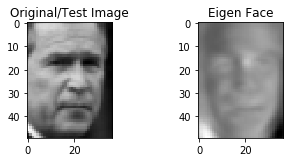

In [273]:
#eigen_faces.shape
#plt.imshow(pca.components_[0,:].reshape(row, col), cmap = 'gray')

# Take as input the no. of sample you want to see
nth_sample = 3

#Plotting the original image
plt.subplot(131)
plt.imshow(test_data[nth_sample,:].reshape(row, col), cmap = 'gray')
plt.title("Original/Test Image")

#Plotting corresponding Eigen face
plt.subplot(132)
plt.imshow(eigen_faces[nth_sample,:].reshape(row, col), cmap = 'gray')
plt.title("Eigen Face")

plt.subplots_adjust(left = 0.01, right = 1, top = 0.9, bottom = 0.01, wspace = 1, hspace = 1)

